Available columns:
Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

Estimated Parameters:
mu = 25.802708360471062
lambda = 0.0014590905290116402
c = 0.02155093826777716


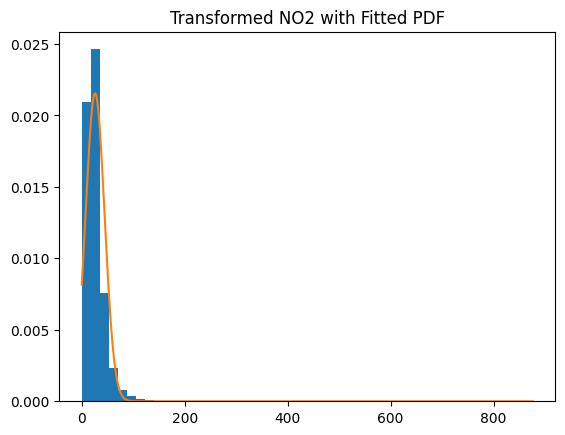

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/data.csv (2).zip", encoding="latin1", low_memory=False)


df.columns = df.columns.str.strip()

print("Available columns:")
print(df.columns)


no2_col = [col for col in df.columns if col.lower() == "no2"]

if len(no2_col) == 0:
    raise Exception("NO2 column not found. Check column names above.")
else:
    no2_col = no2_col[0]

x = pd.to_numeric(df[no2_col], errors="coerce").dropna().values


r = 102303612

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)


z = x + a_r * np.sin(b_r * x)


mu = np.mean(z)
variance = np.var(z)

lam = 1 / (2 * variance)
c = 1 / np.sqrt(2 * np.pi * variance)

print("\nEstimated Parameters:")
print("mu =", mu)
print("lambda =", lam)
print("c =", c)


plt.hist(z, bins=50, density=True)

z_vals = np.linspace(min(z), max(z), 500)
pdf = c * np.exp(-lam * (z_vals - mu)**2)

plt.plot(z_vals, pdf)
plt.title("Transformed NO2 with Fitted PDF")
plt.show()
